# Artificial Intelligence Nanodegree
## Machine Translation Project
In this notebook, sections that end with **'(IMPLEMENTATION)'** in the header indicate that the following blocks of code will require additional functionality which you must provide. Please be sure to read the instructions carefully!

## Introduction
In this notebook, you will build a deep neural network that functions as part of an end-to-end machine translation pipeline. Your completed pipeline will accept English text as input and return the French translation.

- **Preprocess** - You'll convert text to sequence of integers.
- **Models** Create models which accepts a sequence of integers as input and returns a probability distribution over possible translations. After learning about the basic types of neural networks that are often used for machine translation, you will engage in your own investigations, to design your own model!
- **Prediction** Run the model on English text.

## Dataset
We begin by investigating the dataset that will be used to train and evaluate your pipeline.  The most common datasets used for machine translation are from [WMT](http://www.statmt.org/).  However, that will take a long time to train a neural network on.  We'll be using a dataset we created for this project that contains a small vocabulary.  You'll be able to train your model in a reasonable time with this dataset.
### Load Data
The data is located in `data/small_vocab_en` and `data/small_vocab_fr`. The `small_vocab_en` file contains English sentences with their French translations in the `small_vocab_fr` file. Load the English and French data from these files from running the cell below.

In [1]:
import helper

# Load English data
english_sentences = helper.load_data('data/small_vocab_en')
# Load French data
french_sentences = helper.load_data('data/small_vocab_fr')

print('Dataset Loaded')

Dataset Loaded


### Files
Each line in `small_vocab_en` contains an English sentence with the respective translation in each line of `small_vocab_fr`.  View the first two lines from each file.

In [2]:
for sample_i in range(2):
    print('small_vocab_en Line {}:  {}'.format(sample_i + 1, english_sentences[sample_i]))
    print('small_vocab_fr Line {}:  {}'.format(sample_i + 1, french_sentences[sample_i]))

small_vocab_en Line 1:  new jersey is sometimes quiet during autumn , and it is snowy in april .
small_vocab_fr Line 1:  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
small_vocab_en Line 2:  the united states is usually chilly during july , and it is usually freezing in november .
small_vocab_fr Line 2:  les états-unis est généralement froid en juillet , et il gèle habituellement en novembre .


From looking at the sentences, you can see they have been preprocessed already.  The puncuations have been delimited using spaces. All the text have been converted to lowercase.  This should save you some time, but the text requires more preprocessing.
### Vocabulary
The complexity of the problem is determined by the complexity of the vocabulary.  A more complex vocabulary is a more complex problem.  Let's look at the complexity of the dataset we'll be working with.

In [3]:
import collections


english_words_counter = collections.Counter([word for sentence in english_sentences for word in sentence.split()])
french_words_counter = collections.Counter([word for sentence in french_sentences for word in sentence.split()])

print('{} English words.'.format(len([word for sentence in english_sentences for word in sentence.split()])))
print('{} unique English words.'.format(len(english_words_counter)))
print('10 Most common words in the English dataset:')
print('"' + '" "'.join(list(zip(*english_words_counter.most_common(10)))[0]) + '"')
print()
print('{} French words.'.format(len([word for sentence in french_sentences for word in sentence.split()])))
print('{} unique French words.'.format(len(french_words_counter)))
print('10 Most common words in the French dataset:')
print('"' + '" "'.join(list(zip(*french_words_counter.most_common(10)))[0]) + '"')

1823250 English words.
227 unique English words.
10 Most common words in the English dataset:
"is" "," "." "in" "it" "during" "the" "but" "and" "sometimes"

1961295 French words.
355 unique French words.
10 Most common words in the French dataset:
"est" "." "," "en" "il" "les" "mais" "et" "la" "parfois"


For comparison, _Alice's Adventures in Wonderland_ contains 2,766 unique words of a total of 15,500 words.
## Preprocess
For this project, you won't use text data as input to your model. Instead, you'll convert the text into sequences of integers using the following preprocess methods:
1. Tokenize the words into ids
2. Add padding to make all the sequences the same length.

Time to start preprocessing the data...
### Tokenize (IMPLEMENTATION)
For a neural network to predict on text data, it first has to be turned into data it can understand. Text data like "dog" is a sequence of ASCII character encodings.  Since a neural network is a series of multiplication and addition operations, the input data needs to be number(s).

We can turn each character into a number or each word into a number.  These are called character and word ids, respectively.  Character ids are used for character level models that generate text predictions for each character.  A word level model uses word ids that generate text predictions for each word.  Word level models tend to learn better, since they are lower in complexity, so we'll use those.

Turn each sentence into a sequence of words ids using Keras's [`Tokenizer`](https://keras.io/preprocessing/text/#tokenizer) function. Use this function to tokenize `english_sentences` and `french_sentences` in the cell below.

Running the cell will run `tokenize` on sample data and show output for debugging.

In [4]:
import project_tests as tests
from keras.preprocessing.text import Tokenizer


def tokenize(x):
    """
    Tokenize x.
    
    Args:
        x: List of sentences/strings to be tokenized.
    
    Returns:
        tuple: Tuple of (tokenized x data, tokenizer used to tokenize x).
    """
    # TODO: Implement
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(x)
    return tokenizer.texts_to_sequences(x), tokenizer

tests.test_tokenize(tokenize)

# Tokenize Example output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']
text_tokenized, text_tokenizer = tokenize(text_sentences)
print(text_tokenizer.word_index)
print()
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))

Using TensorFlow backend.


{'the': 1, 'quick': 2, 'a': 3, 'brown': 4, 'fox': 5, 'jumps': 6, 'over': 7, 'lazy': 8, 'dog': 9, 'by': 10, 'jove': 11, 'my': 12, 'study': 13, 'of': 14, 'lexicography': 15, 'won': 16, 'prize': 17, 'this': 18, 'is': 19, 'short': 20, 'sentence': 21}

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [1, 2, 4, 5, 6, 7, 1, 8, 9]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [10, 11, 12, 2, 13, 14, 15, 16, 3, 17]
Sequence 3 in x
  Input:  This is a short sentence .
  Output: [18, 19, 3, 20, 21]


### Padding (IMPLEMENTATION)
When batching the sequence of word ids together, each sequence needs to be the same length.  Since sentences are dynamic in length, we can add padding to the end of the sequences to make them the same length.

Make sure all the English sequences have the same length and all the French sequences have the same length by adding padding to the **end** of each sequence using Keras's [`pad_sequences`](https://keras.io/preprocessing/sequence/#pad_sequences) function.

In [5]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences


def pad(x, length=None):
    """
    Pad x.
    
    Args:
        x: List of sequences.
    
    Returns:
        ndarray: Padded numpy array of sequences.
        
    """
    return pad_sequences(x, maxlen=length, padding='post')
    
tests.test_pad(pad)

# Pad Tokenized output
test_pad = pad(text_tokenized)
for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(np.array(token_sent)))
    print('  Output: {}'.format(pad_sent))

Sequence 1 in x
  Input:  [1 2 4 5 6 7 1 8 9]
  Output: [1 2 4 5 6 7 1 8 9 0]
Sequence 2 in x
  Input:  [10 11 12  2 13 14 15 16  3 17]
  Output: [10 11 12  2 13 14 15 16  3 17]
Sequence 3 in x
  Input:  [18 19  3 20 21]
  Output: [18 19  3 20 21  0  0  0  0  0]


### Preprocess Pipeline
Your focus for this project is to build neural network architecture, so we won't ask you to create a preprocess pipeline.  Instead, we've provided you with the implementation of the `preprocess` function.

In [6]:
def preprocess(x, y):
    """
    Preprocess x and y.
    
    Args:
        x: Feature List of sentences.
        y: Label List of sentences.
    
    Returns:
        tuple: Tuple of (Preprocessed x, Preprocessed y, x tokenizer, y tokenizer).
        
    """
    preprocess_x, x_tk = tokenize(x)
    preprocess_y, y_tk = tokenize(y)

    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)

    # Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)

    return preprocess_x, preprocess_y, x_tk, y_tk

preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer =\
    preprocess(english_sentences, french_sentences)

print('Data Preprocessed')

Data Preprocessed


## Models
In this section, you will experiment with various neural network architectures.
You will begin by training four relatively simple architectures.
- Model 1 is a simple RNN
- Model 2 is a RNN with Embedding
- Model 3 is a Bidirectional RNN
- Model 4 is an optional Encoder-Decoder RNN

After experimenting with the four simple architectures, you will construct a deeper architecture that is designed to outperform all four models.
### Ids Back to Text
The neural network will be translating the input to words ids, which isn't the final form we want.  We want the French translation.  The function `logits_to_text` will bridge the gab between the logits from the neural network to the French translation.  You'll be using this function to better understand the output of the neural network.

In [7]:
def logits_to_text(logits, tokenizer):
    """
    Turn logits from a neural network into text using the tokenizer.
    
    Args:
        logits: Logits from a neural network.
        tokenizer: Keras Tokenizer fit on the labels.
    
    Returns:
        str: String that represents the text of the logits.
    
    """
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

print('`logits_to_text` function loaded.')

`logits_to_text` function loaded.


### Model 1: RNN (IMPLEMENTATION)
![RNN](images/rnn.png)
A basic RNN model is a good baseline for sequence data.  In this model, you'll build a RNN that translates English to French.

In [8]:
from keras.layers import GRU, Input, Dense, TimeDistributed
from keras.models import Model
from keras.layers import Activation
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy


def simple_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and compile a basic RNN on x and y.
    
    Args:
        input_shape (tuple): Tuple of input shape.
        output_sequence_length (int): Length of output sequence
        english_vocab_size (int): Number of unique English words in the dataset
        french_vocab_size (int): Number of unique French words in the dataset
    
    Returns: 
        keras.models.Model: Keras model built, but not trained.
    
    """
    # TODO: Build the layers
    cell_state_size = 128
    
    inputs = Input(shape=input_shape[1:])
    grus = GRU(cell_state_size, return_sequences=True)(inputs)
    outputs = TimeDistributed(Dense(french_vocab_size, activation='softmax'))(grus)
    model = Model(inputs, outputs)
    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    return model


tests.test_simple_model(simple_model)


# Reshape the input to work with a basic RNN.
tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2], 1))

# Train the neural network.
simple_rnn_model = simple_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index) + 1,  # Add 1 for <PAD> character.
    len(french_tokenizer.word_index) + 1)
simple_rnn_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=10, validation_split=0.2)

# Print prediction(s).
print(logits_to_text(simple_rnn_model.predict(tmp_x[:1])[0], french_tokenizer))

Train on 110288 samples, validate on 27573 samples
Epoch 1/10
110288/110288 [==============================] - 89s - loss: 2.9662 - acc: 0.4408 - val_loss: 2.3125 - val_acc: 0.4814
Epoch 2/10
110288/110288 [==============================] - 92s - loss: 2.0562 - acc: 0.5311 - val_loss: 1.8252 - val_acc: 0.5694
Epoch 3/10
110288/110288 [==============================] - 89s - loss: 1.7022 - acc: 0.5772 - val_loss: 1.6102 - val_acc: 0.5930
Epoch 4/10
110288/110288 [==============================] - 92s - loss: 1.5496 - acc: 0.6036 - val_loss: 1.4916 - val_acc: 0.6139
Epoch 5/10
110288/110288 [==============================] - 87s - loss: 1.4441 - acc: 0.6190 - val_loss: 1.3978 - val_acc: 0.6244
Epoch 6/10
110288/110288 [==============================] - 88s - loss: 1.3599 - acc: 0.6304 - val_loss: 1.3242 - val_acc: 0.6346
Epoch 7/10
110288/110288 [==============================] - 87s - loss: 1.2933 - acc: 0.6414 - val_loss: 1.2629 - val_acc: 0.6457
Epoch 8/10
110288/110288 [=============

### Model 2: Embedding (IMPLEMENTATION)
![RNN](images/embedding.png)
You've turned the words into ids, but there's a better representation of a word.  This is called word embeddings.  An embedding is a vector representation of the word that is close to similar words in n-dimensional space, where the n represents the size of the embedding vectors.

In this model, you'll create a RNN model using embedding.

In [9]:
from keras.layers.embeddings import Embedding


def embed_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and compile a RNN model using word embedding on x and y.
    
    Args:
        input_shape (tuple): Tuple of input shape.
        output_sequence_length (int): Length of output sequence
        english_vocab_size (int): Number of unique English words in the dataset
        french_vocab_size (int): Number of unique French words in the dataset
    
    Returns: 
        keras.models.Model: Keras model built, but not trained.
    
    """
    # TODO: Implement
    embedding_size = 64
    cell_state_size = 128
    
    inputs = Input(shape=input_shape[1:])
    embeddings = Embedding(input_dim=english_vocab_size, 
                           output_dim=embedding_size, 
                           input_length=output_sequence_length, 
                           mask_zero=True)(inputs)
    grus = GRU(cell_state_size, return_sequences=True)(embeddings)
    outputs = TimeDistributed(Dense(french_vocab_size, activation='softmax'))(grus)
    model = Model(inputs, outputs)
    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    return model


tests.test_embed_model(embed_model)


# TODO: Reshape the input.
tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2]))

# TODO: Train the neural network.
embed_rnn_model = embed_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index) + 1,  # Add 1 for <PAD> character.
    len(french_tokenizer.word_index) + 1)

embed_rnn_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=10, validation_split=0.2)

# TODO: Print prediction(s).
print(logits_to_text(embed_rnn_model.predict(tmp_x[:1])[0], french_tokenizer))

Train on 110288 samples, validate on 27573 samples
Epoch 1/10
110288/110288 [==============================] - 97s - loss: 4.4797 - acc: 0.1430 - val_loss: 3.5926 - val_acc: 0.2127
Epoch 2/10
110288/110288 [==============================] - 96s - loss: 2.8099 - acc: 0.3216 - val_loss: 2.2229 - val_acc: 0.4357
Epoch 3/10
110288/110288 [==============================] - 96s - loss: 1.7747 - acc: 0.5710 - val_loss: 1.4146 - val_acc: 0.6530
Epoch 4/10
110288/110288 [==============================] - 96s - loss: 1.2210 - acc: 0.6869 - val_loss: 1.0544 - val_acc: 0.7217
Epoch 5/10
110288/110288 [==============================] - 96s - loss: 0.9416 - acc: 0.7453 - val_loss: 0.8441 - val_acc: 0.7648
Epoch 6/10
110288/110288 [==============================] - 96s - loss: 0.7755 - acc: 0.7827 - val_loss: 0.7184 - val_acc: 0.7947
Epoch 7/10
110288/110288 [==============================] - 96s - loss: 0.6703 - acc: 0.8067 - val_loss: 0.6296 - val_acc: 0.8169
Epoch 8/10
110288/110288 [=============

### Model 3: Bidirectional RNNs (IMPLEMENTATION)
![RNN](images/bidirectional.png)

One restriction of a RNN is that it can't see the future input, only the past.  This is where bidirectional recurrent neural networks come in.  They are able to see the future data.

In [10]:
from keras.layers import Bidirectional


def bd_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and compile a bidirectional RNN model on x and y.
    
    Args:
        input_shape (tuple): Tuple of input shape.
        output_sequence_length (int): Length of output sequence
        english_vocab_size (int): Number of unique English words in the dataset
        french_vocab_size (int): Number of unique French words in the dataset
    
    Returns: 
        keras.models.Model: Keras model built, but not trained.
    
    """
    # TODO: Implement
    cell_state_size = 128
    
    inputs = Input(shape=input_shape[1:])
    grus = Bidirectional(GRU(cell_state_size, return_sequences=True))(inputs)
    outputs = TimeDistributed(Dense(french_vocab_size, activation='softmax'))(grus)
    model = Model(inputs, outputs)
    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    return model


tests.test_bd_model(bd_model)


# TODO: Train and Print prediction(s)
tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2], 1))

bd_rnn_model = bd_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index) + 1,
    len(french_tokenizer.word_index) + 1)

bd_rnn_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=10, validation_split=0.2)

# TODO: Print prediction(s)
print(logits_to_text(bd_rnn_model.predict(tmp_x[:1])[0], french_tokenizer))

Train on 110288 samples, validate on 27573 samples
Epoch 1/10
110288/110288 [==============================] - 142s - loss: 2.5562 - acc: 0.5151 - val_loss: 1.7393 - val_acc: 0.5808
Epoch 2/10
110288/110288 [==============================] - 141s - loss: 1.5541 - acc: 0.6023 - val_loss: 1.4266 - val_acc: 0.6195
Epoch 3/10
110288/110288 [==============================] - 140s - loss: 1.3579 - acc: 0.6281 - val_loss: 1.2997 - val_acc: 0.6360
Epoch 4/10
110288/110288 [==============================] - 140s - loss: 1.2589 - acc: 0.6461 - val_loss: 1.2212 - val_acc: 0.6525
Epoch 5/10
110288/110288 [==============================] - 141s - loss: 1.1905 - acc: 0.6605 - val_loss: 1.1603 - val_acc: 0.6658
Epoch 6/10
110288/110288 [==============================] - 141s - loss: 1.1366 - acc: 0.6705 - val_loss: 1.1141 - val_acc: 0.6722
Epoch 7/10
110288/110288 [==============================] - 141s - loss: 1.0943 - acc: 0.6768 - val_loss: 1.0751 - val_acc: 0.6779
Epoch 8/10
110288/110288 [======

### Model 4: Encoder-Decoder (OPTIONAL)
Time to look at encoder-decoder models.  This model is made up of an encoder and decoder. The encoder creates a matrix representation of the sentence.  The decoder takes this matrix as input and predicts the translation as output.

Create an encoder-decoder model in the cell below.

#### Model 4.1 Encoder-Decoder model using `RepeatVector`

In [14]:
from keras.layers import RepeatVector


def encdec_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and compile an encoder-decoder model on x and y.
    
    Args:
        input_shape (tuple): Tuple of input shape.
        output_sequence_length (int): Length of output sequence.
        english_vocab_size (int): Number of unique English words in the dataset.
        french_vocab_size (int): Number of unique French words in the dataset.
    
    Returns: 
        keras.models.Model: Keras model built, but not trained.
    
    """
    # OPTIONAL: Implement
    cell_state_size = 128
    
    inputs = Input(shape=input_shape[1:]) 
    encoded = GRU(cell_state_size)(inputs)
    encoded = RepeatVector(output_sequence_length)(encoded)
    
    decoded = GRU(cell_state_size, return_sequences=True)(encoded)
    outputs = TimeDistributed(Dense(french_vocab_size, activation='softmax'))(decoded)
    model = Model(inputs, outputs)
    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    return model


tests.test_encdec_model(encdec_model)


# OPTIONAL: Train and Print prediction(s)
tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2], 1))

encdec_rnn_model = encdec_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index) + 1,
    len(french_tokenizer.word_index) + 1)

encdec_rnn_model.fit(tmp_x, preproc_french_sentences, batch_size=1024, epochs=10, validation_split=0.2)

print(logits_to_text(encdec_rnn_model.predict(tmp_x[:1])[0], french_tokenizer))

Train on 110288 samples, validate on 27573 samples
Epoch 1/10
110288/110288 [==============================] - 150s - loss: 3.0985 - acc: 0.4378 - val_loss: 2.5357 - val_acc: 0.4763
Epoch 2/10
110288/110288 [==============================] - 146s - loss: 2.3958 - acc: 0.4892 - val_loss: 2.2757 - val_acc: 0.5063
Epoch 3/10
110288/110288 [==============================] - 149s - loss: 2.1561 - acc: 0.5038 - val_loss: 2.0378 - val_acc: 0.5139
Epoch 4/10
110288/110288 [==============================] - 149s - loss: 1.9482 - acc: 0.5262 - val_loss: 1.8686 - val_acc: 0.5443
Epoch 5/10
110288/110288 [==============================] - 150s - loss: 1.8001 - acc: 0.5501 - val_loss: 1.7409 - val_acc: 0.5606
Epoch 6/10
110288/110288 [==============================] - 149s - loss: 1.6914 - acc: 0.5631 - val_loss: 1.6425 - val_acc: 0.5677
Epoch 7/10
110288/110288 [==============================] - 148s - loss: 1.6079 - acc: 0.5752 - val_loss: 1.5746 - val_acc: 0.5844
Epoch 8/10
110288/110288 [======

#### Model 4.2 Traditional Encoder-Decoder model

> **Note**: As an extra challenge, I've implemented a second encoder-decoder model without using `RepeatVector`.

In [52]:
def get_seq2seq_models(english_vocab_size, french_vocab_size, cell_state_size=128, 
                       embedding_size = 64, num_layers=2, use_encoder_embeddings=True, 
                       use_decoder_embeddings=True):
    """
    Build and return three models used for sequence-to-sequence translation.
    
    These models roughly implement the system described by
    [Sequence to Sequence Learning with Neural Networks](https://arxiv.org/abs/1409.3215).
    
    Args:
        english_vocab_size (int): The number of unique English words in the dataset
            including any metatokens like "<PAD>".
        french_vocab_size (int): The number of unique French words in the dataset 
            including any metatokens like "<PAD>".
        cell_state_size (int): The number of dimensions in each cell's state.
        embedding_size (int): The output size the embedding layers.
        num_layers (Optional[int]): The number of layers of GRU cells used by the
            encoder and decoder. Defaults to 2.
        use_encoder_embeddings (Optional[bool]): Whether or not use an embedding layer
            on the model's encoder. Defaults to True.
        use_decoder_embeddings (Optional[bool]): Whether or not use an embedding layer
            on the model's decoder. This makes the model train more slowly but
            dramatically increases validation accuracy.
    
    Returns: 
        A tuple of three Keras models which share parameters: 
            
            1. train_model: This model is used to train all the shared parameters. 
               It has two inputs:
               
                   1. x_encoder_train: This is just the training data, and 
                      should have shape `(num_sequences, input_sequence_len)` 
                      when using embeddings.
                   2. x_decoder_train: This is a version of `y_train` that has
                      been shifted one time-step to the right, and had the
                      "<START>" token inserted at the front. It should have
                      the same shape as `x_encoder_train`.
                      
               This model's output is only used by the optimizer—use the other
               two models for actual prediction.
            
            2. pred_encoder_model: This model is used during prediction to
               encode an English sentence for decoding. It takes a single
               input with shape `(num_sequences, input_sequence_length)`  
               assuming embeddings are used and returns a list of outputs, 
               one for each GRU layer, each with the shape `(num_sequences, 
               cell_state_size)`. 
            
            3. pred_decoder_model: This model is essentially a language model
               which, given the previously translated word and the current state 
               for each of its GRU layers, outputs the probabilities for the
               next word in the translation. Used this way, the first element in
               its input list should have shape `(num_sequences, 1)`, and should 
               be followed `num_layers` cell states, each with shape `(num_sequences, 
               cell_state_size)`. You could also feed in a whole translation and
               use the generated probabilities to calculate its total likelihood.     
    
    """
    # Setup encoder input.
    if use_encoder_embeddings:
        encoder_input = Input(shape=(None,), name='encoder_input')
        encoder_embedding_layer = Embedding(input_dim=english_vocab_size, 
            output_dim=embedding_size, mask_zero=True, name='encoder_embedding')
        embedded_encoder_input = encoder_embedding_layer(encoder_input)
    else:
        encoder_input = Input(shape=(None, english_vocab_size), name='encoder_input')
    encoder_gru_layers = [GRU(cell_state_size, return_sequences=True, return_state=True, 
        name=f'encoder_layer_{layer_num + 1}') for layer_num in range(num_layers - 1)]
    encoder_gru_layers.append(GRU(cell_state_size, return_state=True, 
                                  name=f'encoder_layer_{num_layers}'))
        
    # Setup decoder input.
    if use_decoder_embeddings:
        decoder_input = Input(shape=(None,), name='decoder_input')
        decoder_embedding_layer = Embedding(input_dim=french_vocab_size, 
            output_dim=embedding_size, mask_zero=True, name='decoder_embedding')
        embedded_decoder_input = decoder_embedding_layer(decoder_input)
    else:
        decoder_input = Input(shape=(None, french_vocab_size), name='decoder_input')
    
    decoder_gru_layers = [GRU(cell_state_size, return_sequences=True, return_state=True, 
        name=f'decoder_layer_{layer_num + 1}') for layer_num in range(num_layers)]
    
    # Setup final dense layer.
    dense = Dense(french_vocab_size, activation='softmax')
    dense_distrib = TimeDistributed(dense)
    
    # Connect encoder and decoder layers.
    temp_encoder_input = embedded_encoder_input if use_encoder_embeddings else encoder_input
    temp_decoder_input = embedded_decoder_input if use_decoder_embeddings else decoder_input
    encoder_states = []
    for encoder_layer, decoder_layer in zip(encoder_gru_layers, decoder_gru_layers):
        temp_encoder_output, temp_encoder_state = encoder_layer(temp_encoder_input)
        temp_encoder_input = temp_encoder_output
        temp_decoder_output, temp_decoder_state = decoder_layer(temp_decoder_input, 
            initial_state=temp_encoder_state)
        temp_decoder_input = temp_decoder_output
        encoder_states.append(temp_encoder_state)
    
    # Build the training model.
    output = dense_distrib(temp_decoder_output)
    train_model = Model([encoder_input, decoder_input], output)
    train_model.compile(loss=sparse_categorical_crossentropy,
                        optimizer='adam', metrics=['accuracy'])
    
    # Build prediction encoder model.
    pred_encoder_model = Model(encoder_input, encoder_states)
    
    
    # Build prediction decoder model.
    pred_decoder_state_inputs = [Input(shape=(cell_state_size,), 
        name=f'decoder_layer_{layer_num + 1}_state_input') for layer_num in range(num_layers)]
    
    pred_decoder_states = []
    temp_pred_decoder_input = embedded_decoder_input if use_decoder_embeddings else decoder_input   
    for decoder_layer, decoder_state_input in zip(decoder_gru_layers, pred_decoder_state_inputs):
        temp_pred_decoder_output, temp_pred_decoder_state = decoder_layer(
            temp_pred_decoder_input, initial_state=decoder_state_input)
        temp_pred_decoder_input = temp_pred_decoder_output
        pred_decoder_states.append(temp_pred_decoder_state)
    
    pred_word_probs = dense(temp_pred_decoder_output)

    pred_decoder_model = Model([decoder_input, *pred_decoder_state_inputs], 
                               [pred_word_probs, *pred_decoder_states])
                               
    return train_model, pred_encoder_model, pred_decoder_model

In [121]:
# Declare utility functions used by seq2seq models.

from keras.utils import plot_model
from IPython.display import Image, Markdown
from keras.backend import clear_session
from scipy.ndimage.interpolation import shift
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
import os


num_english_tokens = len(english_tokenizer.word_index) + 1  # Includes <PAD>.
num_french_tokens = len(french_tokenizer.word_index) + 2  # Includes <START>.
start_symbol_index = len(french_tokenizer.word_index) + 1
output_sequence_length = preproc_french_sentences.shape[1] 


def add_start_symbols(sequences):
    """
    Return an array with "<START>" token inserted at the beginning.
    
    Args:
        sequences (ndarray): These should have shape `(num_sequences, 
        sequence_len)`.
    
    Returns:
        ndarray: A numpy array with the same shape as `sequences`, but
            with each token shifted the right and the "<START>" token
            inserted at beginning.
        
    """
    if not isinstance(sequences, np.ndarray):
        sequences = np.array(sequences)
    sequences = shift(sequences, [0, 1])
    sequences[:, 0] = start_symbol_index
    return sequences


def get_seq2seq_data():
    """
    Prepare and return data for use with seq2seq models.
    
    Returns:
        tuple: A tuple containing:
        
            1. x_encoder_train: Data for training the encoder. It
               has shape `(training_set_size, input_sequence_len)`.
            
            2. x_decoder_train: Data for training the encoder. It
               has shape `(training_set_size, output_sequence_len)`.
            
            3. y_train: Correct labels for the training data. It
               has shape `(training_set_size, output_sequence_len, 1)`.
            
            4. x_encoder_val: Data for testing the encoder. It
               has shape `(validation_set_size, input_sequence_len)`.
            
            5. x_decoder_val: Data for testing the decoder. It
               has shape `(validation_set_size, input_sequence_len)`.
            
            6. y_val:  Correct labels for the validation data. It
               has shape `(validation_set_size, output_sequence_len, 1)`.
  
    """
    x_encoder_train, x_encoder_val, y_train, y_val = train_test_split(
        preproc_english_sentences, preproc_french_sentences, shuffle=False, test_size=0.2)
    x_decoder_train = add_start_symbols(y_train.reshape(y_train.shape[:2]))
    x_decoder_val = add_start_symbols(y_val.reshape(y_val.shape[:2]))
        
    return x_encoder_train, x_decoder_train, y_train, x_encoder_val, x_decoder_val, y_val


def seq2seq_predict(sequences, encoder_model, decoder_model):
    """
    Translate the given sequences using the given models.
    
    This builds translations one word at a time by first 
    encoding them using the `encoder_model` and then decoding 
    them one word at a time using the `decoder_model`. 
    
    This is a greedy algorithm. At each time step the most
    likely word is chosen and then feed back into the decoder
    to help it choose the word at the next time-step. A more
    complex implementation could use beam search to correct 
    its mistakes.
    
    Args:
        sequences: The sentences to translate. These are expected
            to have shape `(num_squences, input_sequence_len)`.
            Onehot encoded sequences are NOT supported.
        encoder_model: Keras model to encode `sequences`.
        decoder_model: Keras model to decode the output of the 
            `encoder_model`.
    
    Returns:
        ndarray: The translated sentences with shape 
             `(num_squences, output_sequence_len)`.
    
    """
    output = []
    decoder_layer_states = encoder_model.predict(sequences)
    # Check and make sure `decoder_layer_states`
    # is a list (it won't be if only one GRU layer is used).
    if not isinstance(decoder_layer_states, list):
        decoder_layer_states = [decoder_layer_states]
    decoder_input = np.full((sequences.shape[0], 1), start_symbol_index)
    for t in range(output_sequence_length):
        outputs = decoder_model.predict([decoder_input, *decoder_layer_states])
        probs = outputs[0]
        decoder_layer_states = outputs[1:]
        preds = np.argmax(probs, axis=2)
        output.append(preds)
        decoder_input = preds
    return np.concatenate(output, axis=1)


def show_model(model, width=None):
    """
    Visualize the given model.

    Args:
        model: The Keras model to be visualized.
        width: The width to constrain the image to.
            Defaults to `None` (no constraint).

    """
    file_name = 'ZLYk6F8V873q6ewHmSY5M984.png'
    plot_model(model, to_file=file_name, show_shapes=True)
    display(Image(file_name, width=width, embed=True))
    os.remove(file_name)

    
def indices_to_text(sequences, tokenizer, word_limit=15):
    """
    Convert an array of sequences in index form into a list of strings.

    Args:
        sequences (ndarray): The sequences to convert. These should
            have the shape `(num_sequences, sequence_len)` or
            `(num_sequences, sequence_len, 1)`.
        word_limit (Optional[int]): The number of words to include.
            This can be used to clip distracting "<PAD>" tokens.

    Returns:
        list: A list of `print` friendly strings, one for each 
            of the input sequences.

    """
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'
    index_to_words[len(index_to_words)] = '<START>'
    
    if len(sequences.shape) == 3:
        sequences.shape = sequences.shape[:-1]
    
    output = []
    for sentence in sequences:
        output.append(' '.join(index_to_words[word_index] 
                               for word_index in sentence[:word_limit]))
    return output  

In [53]:
# Setup seq2seq models.

# Get the data.
(x_encoder_train, x_decoder_train, 
 y_train, x_encoder_val, x_decoder_val, y_val) = get_seq2seq_data()

# Create models.
clear_session()
train_model, pred_encoder_model, pred_decoder_model = get_seq2seq_models(
    num_english_tokens, num_french_tokens, cell_state_size=256, 
    use_encoder_embeddings=True, use_decoder_embeddings=True, num_layers=3)

**Training Model**

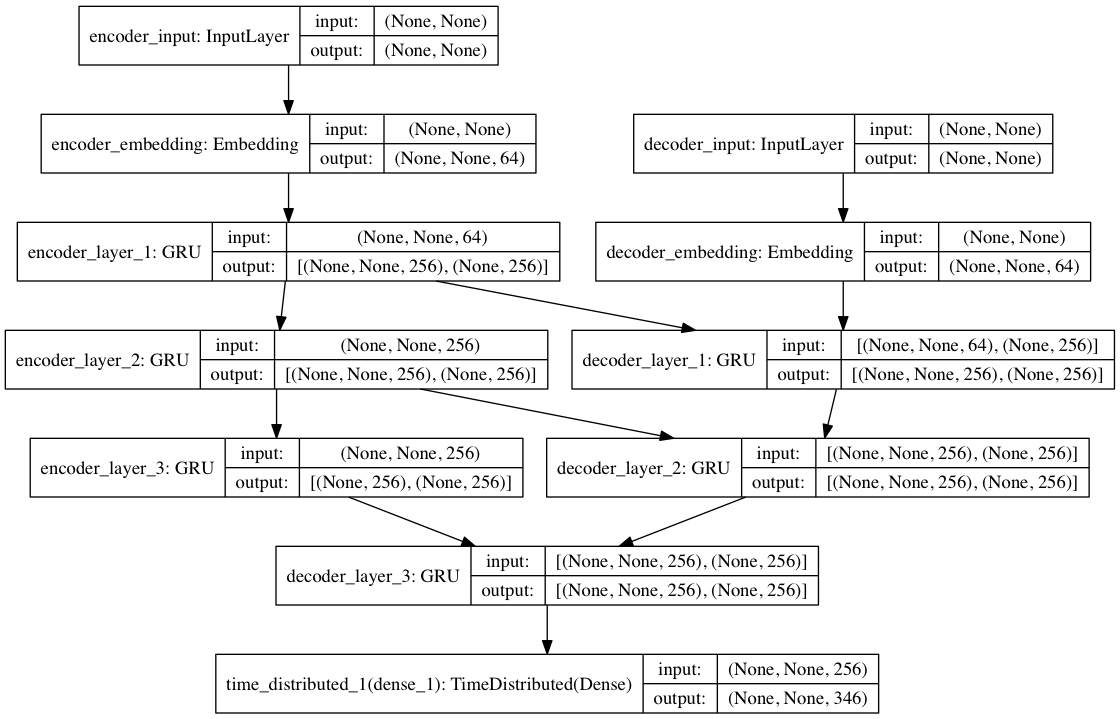

**Prediction Encoder Model**

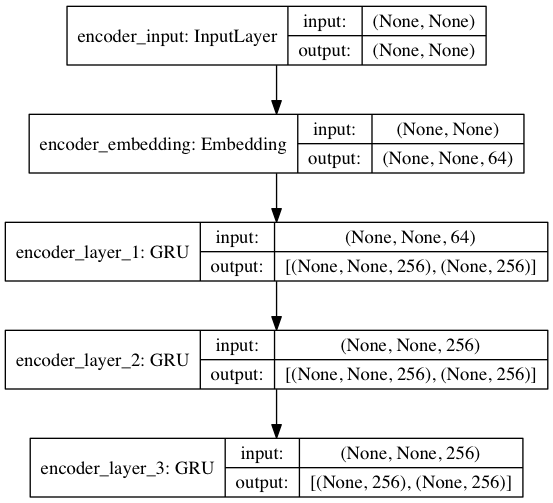

**Prediction Decoder Model**

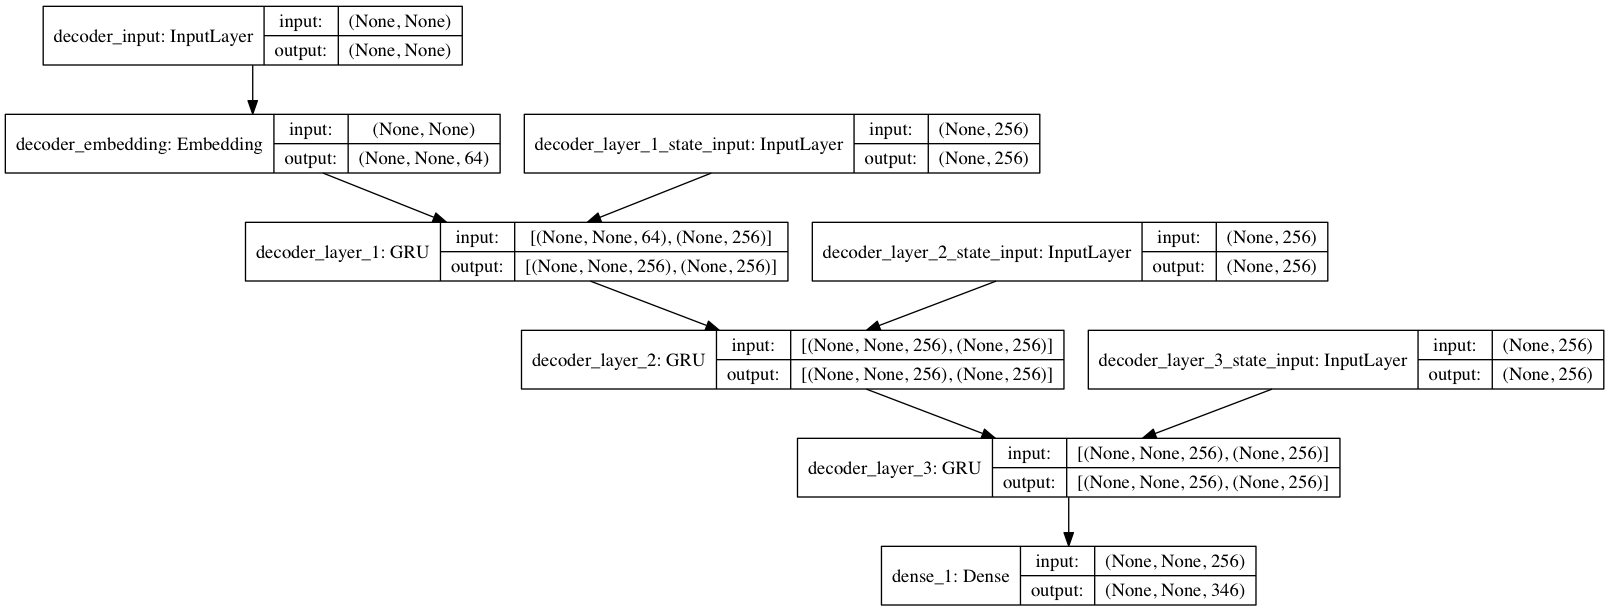

In [135]:
# Visualize the shape of the models.
display(Markdown("**Training Model**"))
show_model(train_model, 700)
print()
display(Markdown("**Prediction Encoder Model**"))
show_model(pred_encoder_model, 350)
print()
display(Markdown("**Prediction Decoder Model**"))
show_model(pred_decoder_model)

In [57]:
# Train the model models.

checkpointer = ModelCheckpoint(filepath='seq2seq_train_model.hdf5', save_best_only=True)

train_model.fit(x=[x_encoder_train, x_decoder_train], y=y_train, 
    batch_size=1024, epochs=75, callbacks=[checkpointer],
    validation_data=([x_encoder_val, x_decoder_val], y_val))

# Load the best weights and save the models.
train_model.load_weights('seq2seq_train_model.hdf5')
pred_encoder_model.save('seq2seq_encoder_model.hdf5')
pred_decoder_model.save('seq2seq_decoder_model.hdf5')

Train on 110288 samples, validate on 27573 samples
Epoch 1/75
110288/110288 [==============================] - 789s - loss: 3.4263 - acc: 0.2488 - val_loss: 2.2443 - val_acc: 0.3895
Epoch 2/75
110288/110288 [==============================] - 811s - loss: 1.8978 - acc: 0.4634 - val_loss: 1.5216 - val_acc: 0.5374
Epoch 3/75
110288/110288 [==============================] - 804s - loss: 1.3117 - acc: 0.5808 - val_loss: 1.1648 - val_acc: 0.6253
Epoch 4/75
110288/110288 [==============================] - 765s - loss: 1.0607 - acc: 0.6477 - val_loss: 0.9831 - val_acc: 0.6673
Epoch 5/75
110288/110288 [==============================] - 739s - loss: 0.9327 - acc: 0.6827 - val_loss: 0.8794 - val_acc: 0.7038
Epoch 6/75
110288/110288 [==============================] - 734s - loss: 0.9439 - acc: 0.6838 - val_loss: 0.8321 - val_acc: 0.7182
Epoch 7/75
110288/110288 [==============================] - 718s - loss: 0.7911 - acc: 0.7307 - val_loss: 0.7568 - val_acc: 0.7425
Epoch 8/75
110288/110288 [======

110288/110288 [==============================] - 738s - loss: 0.0129 - acc: 0.9965 - val_loss: 0.0210 - val_acc: 0.9943
Epoch 63/75
110288/110288 [==============================] - 750s - loss: 0.0124 - acc: 0.9966 - val_loss: 0.0207 - val_acc: 0.9942
Epoch 64/75
110288/110288 [==============================] - 793s - loss: 0.0119 - acc: 0.9968 - val_loss: 0.0211 - val_acc: 0.9940
Epoch 65/75
110288/110288 [==============================] - 755s - loss: 0.0123 - acc: 0.9966 - val_loss: 0.0215 - val_acc: 0.9938
Epoch 66/75
110288/110288 [==============================] - 768s - loss: 0.0120 - acc: 0.9967 - val_loss: 0.0205 - val_acc: 0.9941
Epoch 67/75
110288/110288 [==============================] - 759s - loss: 0.0111 - acc: 0.9969 - val_loss: 0.0198 - val_acc: 0.9944
Epoch 68/75
110288/110288 [==============================] - 782s - loss: 0.0111 - acc: 0.9969 - val_loss: 0.0206 - val_acc: 0.9941
Epoch 69/75
110288/110288 [==============================] - 768s - loss: 0.1744 - acc: 

> **Note**: The training model exaggerates its validation accuracy because the correct, time-shifted translations are being fed into the decoder to help it converge. To get the model's true validation accuracy, translations have to be built one word at a time as they would be on unseen data (done below).

In [124]:
# Get and print the true validation accuracy.
val_output = seq2seq_predict(x_encoder_val, pred_encoder_model, pred_decoder_model)
val_accuracy = accuracy_score(y_val.flatten(), val_output.flatten())
print(f'Best Validation Accuracy: {val_accuracy}\n')

# Translate and print the test sentence used in previous models.
test_sent_output = seq2seq_predict(x_encoder_train[:1], pred_encoder_model, pred_decoder_model)
predicted_sent = indices_to_text(test_sent_output, french_tokenizer, word_limit=15)[0]
true_sent = indices_to_text(y_train[:1], french_tokenizer, word_limit=15)[0]
print(f'Test Sentence Prediction: "{predicted_sent}"')
print(f'Test Sentence True Value: "{true_sent}"')

Best Validation Accuracy: 0.9831771246198403

Test Sentence Prediction: "new jersey est parfois calme pendant l' automne et il est neigeux en avril <PAD>"
Test Sentence True Value: "new jersey est parfois calme pendant l' automne et il est neigeux en avril <PAD>"


### Model 5: Custom (IMPLEMENTATION)
Use everything you learned from the previous models to create a model that incorporates embedding and a bidirectional rnn into one model.

> **Note**: I've used the `RepeatVector` version of the Encoder-Decoder model in `model_final` because the rubric requires that I use a bidirectional RNN and the `RepeatVector` version has a more straightforward bidirectional implementation (the `Bidirectional` wrapper doesn't appear to allow you to pipe in an initial cell state, which I need for the traditional Encoder-Decoder model). Without that constraint, I'd probably have chosen the model above because I found it to be easier to train and it doesn't seem to need as many parameters as the `RepeatVector` version to perform well.

>Also, when comparing training times, note that the model below was trained on an EC2 GPU instance. All the above models were trained on a Mid 2012 MacBook Pro.

In [95]:
def model_final(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a model that incorporates embedding, encoder-decoder, 
    and bidirectional RNN on x and y.
    
    Args:
        input_shape (tuple): Tuple of input shape.
        output_sequence_length (int): Length of output sequence
        english_vocab_size (int): Number of unique English words in the dataset
        french_vocab_size (int): Number of unique French words in the dataset
    
    Returns: 
        keras.models.Model: Keras model built, but not trained.
    
    """
    # TODO: Implement
    cell_state_size = 1024
    embedding_size = 64
    
    inputs = Input(shape=input_shape[1:])
    embeddings = Embedding(input_dim=english_vocab_size, 
                           output_dim=embedding_size, 
                           input_length=input_shape[1], 
                           mask_zero=True)(inputs)
    encoded = Bidirectional(GRU(cell_state_size, return_sequences=True))(embeddings)
    encoded = Bidirectional(GRU(cell_state_size))(encoded)
    encoded = RepeatVector(output_sequence_length)(encoded)
    
    decoded = Bidirectional(GRU(cell_state_size, return_sequences=True))(encoded)
    decoded = Bidirectional(GRU(cell_state_size, return_sequences=True))(decoded)
    outputs = TimeDistributed(Dense(french_vocab_size, activation='softmax'))(decoded)
    model = Model(inputs, outputs)
    
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    return model


tests.test_model_final(model_final)


print('Final Model Loaded')

Final Model Loaded


## Prediction (IMPLEMENTATION)

In [96]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.backend import clear_session
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split


def final_predictions(x, y, x_tk, y_tk):
    """
    Gets predictions using the final model.
    
    Args:
        x: The preprocessed English data.
        y: The preprocessed French data.
        x_tk: The English tokenizer.
        y_tk: The French tokenizer.
        
    """
    # TODO: Train neural network using model_final
    
    # Split the data.
    X = pad(x, x.shape[1])
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, 
                                                      shuffle=False)

    # Build the model.
    clear_session()
    model = model_final(X_train.shape,
                        y_train.shape[1],
                        len(x_tk.word_index) + 1, 
                        len(y_tk.word_index) + 1)

    # Train the model.
    checkpointer = ModelCheckpoint(filepath='final_model.hdf5', 
                                   save_best_only=True,
                                   verbose=0)
    model.fit(X_train, 
              y_train, 
              batch_size=1024, 
              epochs=25, 
              validation_data=(X_val, y_val),
              callbacks=[checkpointer])

    # Print best validation accuracy.
    model.load_weights('final_model.hdf5')
    scores = model.evaluate(X_val, y_val, verbose=0)
    print("\nBest Validation Accuracy:", scores[1], '\n')
    
    ## DON'T EDIT ANYTHING BELOW THIS LINE
    y_id_to_word = {value: key for key, value in y_tk.word_index.items()}
    y_id_to_word[0] = '<PAD>'

    sentence = 'he saw a old yellow truck'
    sentence = [x_tk.word_index[word] for word in sentence.split()]
    sentence = pad_sequences([sentence], maxlen=x.shape[-1], padding='post')
    sentences = np.array([sentence[0], x[0]])
    predictions = model.predict(sentences, len(sentences))

    print('Sample 1:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[0]]))
    print('Il a vu un vieux camion jaune')
    print('Sample 2:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[1]]))
    print(' '.join([y_id_to_word[x[0]] for x in y[0]]))

final_predictions(preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer)

Train on 110288 samples, validate on 27573 samples
Epoch 1/25
110288/110288 [==============================] - 658s 6ms/step - loss: 2.4587 - acc: 0.4724 - val_loss: 1.6853 - val_acc: 0.5668
Epoch 2/25
110288/110288 [==============================] - 653s 6ms/step - loss: 1.4483 - acc: 0.6126 - val_loss: 1.1521 - val_acc: 0.6771
Epoch 3/25
110288/110288 [==============================] - 650s 6ms/step - loss: 1.0018 - acc: 0.7149 - val_loss: 0.8379 - val_acc: 0.7518
Epoch 4/25
110288/110288 [==============================] - 655s 6ms/step - loss: 0.7648 - acc: 0.7702 - val_loss: 0.6487 - val_acc: 0.8003
Epoch 5/25
110288/110288 [==============================] - 655s 6ms/step - loss: 0.5761 - acc: 0.8242 - val_loss: 0.4655 - val_acc: 0.8580
Epoch 6/25
110288/110288 [==============================] - 655s 6ms/step - loss: 0.3912 - acc: 0.8810 - val_loss: 0.3218 - val_acc: 0.9011
Epoch 7/25
110288/110288 [==============================] - 655s 6ms/step - loss: 0.2792 - acc: 0.9142 - val_

## Submission
When you are ready to submit your project, do the following steps:
1. Ensure you pass all points on the [rubric](https://review.udacity.com/#!/rubrics/1004/view).
2. Submit the following in a zip file.
  - `helper.py`
  - `machine_translation.ipynb`
  - `machine_translation.html`
    - You can export the notebook by navigating to **File -> Download as -> HTML (.html)**.